# MVTS Data Toolkit

## Demo

This demo is designed to give the user a quick tour over the software's funcionalities. Below is a list of all the things one could see in this demo:
 - Downloading a dataset of 2000 multivariate time series (mvts) instances.
 - Getting some basic statistics about your data.
 - Extracting a list of statistical features from the mvts instances.
 - ...

In [1]:
import os
import yaml
from data.data_retriever import DataRetriever  # for downloading data
import CONSTANTS as CONST

## Download the Dataset
In this demo we use an example dataset. In the following cells, it will be automatically downloaded. But in case something goes wrong, here is the direct link:
https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/petdataset_01.zip

Before we download it, let's take a quick look:

In [2]:
dr = DataRetriever(1)
dr.print_info()

URL:		https://bitbucket.org/gsudmlab/mvtsdata_toolkit/downloads/petdataset_01.zip
NAME:		petdataset_01.zip
TYPE:		application/zip
SIZE:		32M


Ready to download? This may take a few seconds, depending on your internet bandwidth. Wait for the progress bar.

In [3]:
where_to = './temp/'
dr.retrieve(target_path = where_to)

Extracting: 100%|██████████| 2001/2001 [00:00<00:00, 2914.24it/s]


OK. Let's see how many files are available to us now.

In [4]:
dr.get_total_number_of_files()

2000

## Setup Configurations
For tasks such as feature extraction (by `features.feature_extractor`) and data analysis (by `data_analysis.mvts_data_analysis` and `data_analysis.extracted_features_analysis`) a configuration file must be provided. There is one already provided inside this package, but you can create your own and place it anywhere you wish.

Let's take a look at the provided config file which is located at `./configs/feature_extraction_configs.yml`:

In [5]:
path_to_config = './configs/demo_configs.yml'
with open(path_to_config, 'r') as f:
    print(f.read())

PATH_TO_MVTS: './temp/petdataset_01/'
PATH_TO_EXTRACTED_FEATURES: './temp/extracted_features/'
META_DATA_TAGS: ['id', 'lab', 'st', 'et']
MVTS_PARAMETERS:
  - 'TOTUSJH'
  - 'TOTBSQ'
  - 'TOTPOT'
  - 'TOTUSJZ'
  - 'ABSNJZH'
  - 'SAVNCPP'
STATISTICAL_FEATURES:
  - 'get_min'
  - 'get_max'
  - 'get_median'
  - 'get_mean'
  - 'get_stddev'
  - 'get_var'
  - 'get_skewness'
  - 'get_kurtosis'
  - 'get_no_local_maxima'
  - 'get_no_local_minima'
  - 'get_no_local_extrema'
  - 'get_no_zero_crossings'
  - 'get_mean_local_maxima_value'
  - 'get_mean_local_minima_value'
  - 'get_no_mean_local_maxima_upsurges'
  - 'get_no_mean_local_minima_downslides'
  - 'get_difference_of_mins'
  - 'get_difference_of_maxs'
  - 'get_difference_of_means'
  - 'get_difference_of_stds'
  - 'get_difference_of_vars'
  - 'get_difference_of_medians'
  - 'get_dderivative_mean'
  - 'get_gderivative_mean'
  - 'get_dderivative_stddev'
  - 'get_gderivative_stddev'
  - 'get_dderivative_skewness'
  - 'get_gderivative_skewness'
  - 

Here is the break-down of the pieces:
 - `PATH_to_MVTS`: A relative or absolute path to where the multivariate time series dataset is stored at.
 - `PATH_TO_EXTRACTED`: A relative or absolute path to where the extracted features should be stored at, using the Feature Extraction component of the package.
 - `META_DATA_TAGS`: A list of tags based on which some pieces of information can be extracted from the file-names of the multivariate time series. For example, if timestamps are encoded in the file-names, e.g., `_st[YYYY-MM-DD HH:MM:SS]`, then the string `st` (without brackets) is a tag that can be included in this list. In the feature extraction process, this adds what is wrapped in the square brackets in each filename, as an extra column to the data-frame of the extracted features. Generally, using this functionality, any extra metadata can be encoded in the file-names and consequently passed into the extracted features.
 - `MVTS_PARAMETERS`: A list of parameter-names that are used in the multivariate time series dataset and their statistical features are of interest. These are, in other words, the column-names in the multivariate time series files.
 - `STATISTICAL_FEATURES`: A list of statistical features of interest to be extracted from the multivariate time series. They must be chosen from the provided methods in the module `features.feature_collection.py`. For example, `get_min` is a valid feature-name as this method is implemented in the package.
 
 In the following cells, you will see how this can be used.

## Analysis of Raw Data (MVTS Data Analysis)

- #### How many files? How large of a dataset?

Using `mvts_data_analysis` we can get an idea of the dataset we are going to work on. We start with creating an instance of a `MVTSDataAnalysis`.

In [6]:
from data_analysis.mvts_data_analysis import MVTSDataAnalysis
path_to_config = './configs/demo_configs.yml'
mvda = MVTSDataAnalysis(path_to_config)
mvda.print_stat_of_directory()

----------------------------------------
Directory:			/home/azim/CODES/PyCode/mvtsdata_toolkit/./temp/petdataset_01/
Total no. of files:	2000
Total size:			76M
Total average:		38K
----------------------------------------


- #### Get a summary stats of the data.

Let's now get some statistics from the content of the files. To speed up the demo, we analyze only 3 parameters (namely `TOTUSJH`, `TOTBSQ`, and `TOTPOT`), and only the first 50 mvts files.

In [7]:
params = ['TOTUSJH', 'TOTBSQ', 'TOTPOT']
n = 50
mvda.compute_summary(params_name=params, first_k=n)
mvda.summary

,Parameter-Name,Val-Count,Null-Count,mean,min,25th,50th,75th,max
0,TOTUSJH,3000,0,8.042049e+02,4.341081e+00,5.956971e+01,3.400512e+02,1.124406e+03,3.746423e+03
1,TOTBSQ,3000,0,1.149033e+10,2.376532e+07,4.002858e+08,4.478148e+09,1.447476e+10,6.957558e+10
2,TOTPOT,3000,0,1.871504e+23,1.750878e+20,2.813708e+21,3.836189e+22,2.628002e+23,1.425084e+24


... which says the length of the time series, across the 50 mvts files is 3000, including 11 `NA/NAN` values. In addition, `mean`, `min`, `max`, and three quantiles are calculated for each time series.

 - #### You have a LARGE dataset?
 A parallel version of this function is also provided to help process much larger datasets efficiently. Below, we will have 4 processes to compute the summary statistics.

In [8]:
mvda.compute_summary_in_parallel(n_jobs=4, first_k=50, verbose=False,
                                     params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'])
mvda.summary

,Parameter-Name,Val-Count,Null-Count,mean,min,25th,50th,75th,max
0,TOTUSJH,3000,0,7.996792e+02,4.341081e+00,5.957459e+01,3.509520e+02,1.121960e+03,3.746423e+03
1,TOTBSQ,3000,0,1.140743e+10,2.376532e+07,4.003352e+08,4.531651e+09,1.448644e+10,6.957558e+10
2,TOTPOT,3000,0,1.855639e+23,1.750878e+20,2.816190e+21,3.838409e+22,2.627956e+23,1.425084e+24


**Note**: The results of the parallel and sequential versions of `mvts_data_analysis` are not exactly identical. This discrepency is due to the fact that in the parallel version, the program approximates the percentiles. more specifically, it is designed to avoid loading the entire dataset into memory so that it is not confined to any particular data size. Therefore, it relies on some statistical estimators to approximate the percentiles with some acceptable errors. The errors decrease significantly as the number of mvts files increases.

## Feature Extraction

- #### What statistical features are available?

Now that we have an idea about our raw data, let's extract some features from the data. A list of ~50 statistical features are implemented in `feature_collection`. Let's take a look at them.

In [9]:
import features.feature_collection as fc
help(fc)

Help on module features.feature_collection in features:

NAME
    features.feature_collection

FUNCTIONS
    get_average_absolute_change(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: the average absolute first difference of a univariate time series.
    
    get_average_absolute_derivative_change(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: the average absolute first difference of a derivative of univariate time series.
    
    get_avg_mono_decrease_slope(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: the average slope of monotonically decreasing segments.
    
    get_avg_mono_increase_slope(uni_ts:Union[pandas.core.series.Series, numpy.ndarray]) -> numpy.float64
        :return: the average slope of monotonically increasing segments.
    
    get_dderivative_kurtosis(uni_ts:Union[pandas.core.series.Series, numpy.ndarray], step_size:int=1) -> numpy.float

- #### How to extract these features from the data?

Let's extract 3 simple statistical features, namely `min`, `max`, and `median`, from 3 parameters, such as `TOTUSJH`, `TOTBSQ`, and `TOTPOT`. Again, to speed up the process in this demo, we only process the first 50 mvts files.

In [10]:
from features.feature_extractor import FeatureExtractor

fe = FeatureExtractor(path_to_config)
fe.do_extraction(features_name=['get_min', 'get_max', 'get_median'],
                 params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'], first_k=50)
fe.df_all_features

,id,lab,st,et,TOTUSJH_min,TOTUSJH_max,TOTUSJH_median,TOTBSQ_min,TOTBSQ_max,TOTBSQ_median,TOTPOT_min,TOTPOT_max,TOTPOT_median
0,3894,M,2014-03-29T22:00:00,2014-03-30T09:48:00,967.434905,1183.833149,1124.410250,1.046786e+10,1.188663e+10,1.153321e+10,1.228731e+23,1.716971e+23,1.492330e+23
1,3364,NF,2013-11-10T16:24:00,2013-11-11T04:12:00,785.515878,898.419700,841.636672,1.384462e+10,1.505713e+10,1.449548e+10,2.558560e+23,2.903506e+23,2.712413e+23
2,3401,NF,2013-11-19T15:00:00,2013-11-20T02:48:00,43.795702,79.405460,61.347579,3.006945e+08,4.249081e+08,3.883491e+08,1.854126e+21,3.078696e+21,2.787184e+21
3,3595,NF,2014-01-12T09:24:00,2014-01-12T21:12:00,48.647340,65.213699,54.220981,3.276020e+08,4.447089e+08,3.539810e+08,2.278193e+21,3.308322e+21,2.707839e+21
4,3452,NF,2013-12-06T18:24:00,2013-12-07T06:12:00,54.910546,89.248031,64.519227,3.395135e+08,6.300441e+08,4.605988e+08,2.030967e+21,4.775595e+21,2.968826e+21
5,3401,NF,2013-11-23T00:00:00,2013-11-23T11:48:00,16.406938,25.926148,20.134504,1.098692e+08,1.766917e+08,1.430579e+08,6.961236e+20,1.368650e+21,9.542322e+20
6,3313,NF,2013-10-29T06:48:00,2013-10-29T18:36:00,25.213735,45.237145,37.858018,1.640152e+08,3.040086e+08,2.364114e+08,1.079530e+21,2.178500e+21,1.615138e+21
7,3394,NF,2013-11-16T12:48:00,2013-11-17T00:36:00,37.198119,105.665566,74.004088,4.422474e+08,1.066918e+09,7.937949e+08,2.419303e+21,6.886243e+21,4.586577e+21
8,3779,C,2014-02-26T06:24:00,2014-02-26T18:12:00,761.638915,987.804217,901.833056,5.706467e+09,7.378234e+09,6.651778e+09,5.153352e+22,7.974288e+22,7.048366e+22
9,3364,C,2013-11-17T20:24:00,2013-11-18T08:12:00,3410.057526,3746.423110,3583.958457,4.832398e+10,5.258952e+10,5.117475e+10,7.566750e+23,8.037784e+23,7.870867e+23


... where each row corresponds to one mvts file, and the first 4 columns represent the extracted information from the file-names using the tags specified in the configuration file (i.e., `id`, `lab`, `st`, and `et`).

 - #### You have a LARGE dataset?
 No worries. Using the parallel implementation of feature extraction, the process can be significantly sped up. Let's have 4 processes to extract the features.

In [11]:
fe.do_extraction_in_parallel(n_jobs=4,
                             features_name=['get_min', 'get_max', 'get_median'],
                             params_name=['TOTUSJH', 'TOTBSQ', 'TOTPOT'], first_k=50)
fe.df_all_features

,id,lab,st,et,TOTUSJH_min,TOTUSJH_max,TOTUSJH_median,TOTBSQ_min,TOTBSQ_max,TOTBSQ_median,TOTPOT_min,TOTPOT_max,TOTPOT_median
0,3597,NF,2014-01-08T05:36:00,2014-01-08T17:24:00,4.341081,12.261190,7.426589,2.376532e+07,6.548704e+07,3.557751e+07,1.750878e+20,6.645951e+20,3.158317e+20
1,3497,C,2013-12-18T03:24:00,2013-12-18T15:12:00,1681.484071,1910.445613,1770.638465,2.073974e+10,2.410021e+10,2.338266e+10,3.894755e+23,4.511897e+23,4.312311e+23
2,3394,NF,2013-11-21T15:48:00,2013-11-22T03:36:00,32.492713,46.587421,39.022541,2.182987e+08,3.187070e+08,2.731201e+08,1.683164e+21,3.047398e+21,2.492267e+21
3,3813,C,2014-03-08T12:24:00,2014-03-09T00:12:00,804.514582,996.695003,887.737665,6.958456e+09,8.610843e+09,7.866284e+09,7.628546e+22,9.166733e+22,8.168197e+22
4,3480,NF,2013-12-10T07:36:00,2013-12-10T19:24:00,49.251799,83.605791,60.072664,4.090207e+08,6.371692e+08,5.076699e+08,2.802586e+21,5.647560e+21,4.049899e+21
5,3288,C,2013-10-19T20:48:00,2013-10-20T08:36:00,540.275179,669.071529,579.449611,3.820681e+09,4.442559e+09,4.183424e+09,3.335796e+22,4.098702e+22,3.797803e+22
6,3400,NF,2013-11-26T11:12:00,2013-11-26T23:00:00,331.070081,416.835571,389.407235,7.495902e+09,8.156456e+09,8.016263e+09,1.334339e+23,1.474803e+23,1.422880e+23
7,3273,NF,2013-10-21T15:00:00,2013-10-22T02:48:00,297.765488,352.122224,322.602994,2.369360e+09,2.773179e+09,2.640721e+09,1.672819e+22,2.035788e+22,1.935193e+22
8,3364,C,2013-11-08T21:24:00,2013-11-09T09:12:00,619.818638,707.927819,667.581645,1.208091e+10,1.312152e+10,1.269257e+10,1.912164e+23,2.105895e+23,2.030179e+23
9,3287,NF,2013-10-15T23:36:00,2013-10-16T11:24:00,60.458600,98.430700,71.548267,6.041495e+08,7.586510e+08,6.371173e+08,4.280842e+21,7.113572e+21,4.754370e+21


**Note**: Due to the use of multiprocessing, the two outputs (using either single or multiple processes) are only comparable when a unqiue column (here `id`) is set as index.

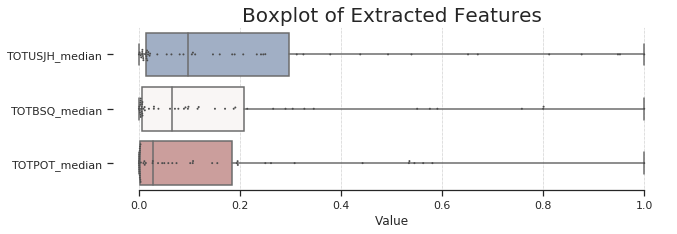

In [17]:
fe.plot_boxplot(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

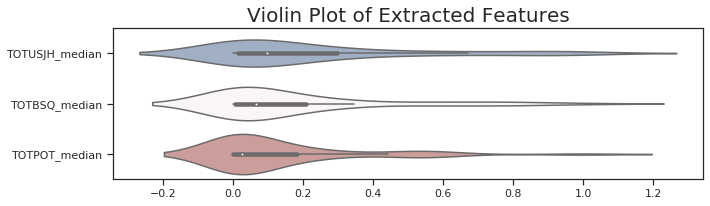

In [18]:
fe.plot_violinplot(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

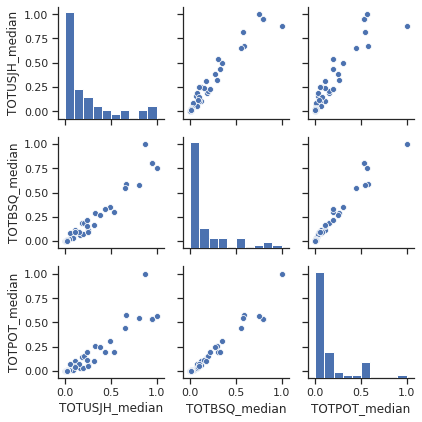

In [19]:
fe.plot_splom(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

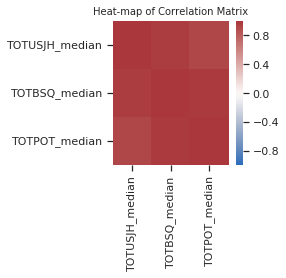

In [20]:
fe.plot_correlation_heatmap(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

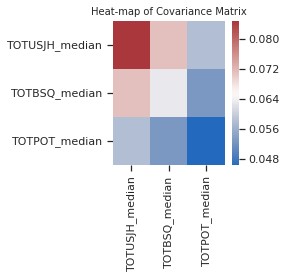

In [21]:
fe.plot_covariance_heatmap(feature_names=['TOTUSJH_median', 'TOTBSQ_median', 'TOTPOT_median'])

## Extracted Features Analysis

- #### A quick look over the results?

The extracted features can be easily summarized using descriptive statistics such as `meam`, `std`, `min`, `max`, and first, second and third quartiles. In addition, any missing value can also be spotted.

In [12]:
from data_analysis.extracted_features_analysis import ExtractedFeaturesAnalysis

efa = ExtractedFeaturesAnalysis(fe.df_all_features, exclude=['id'])
efa.compute_summary()
efa.summary

,Feature-Name,Val-Count,Null-Count,mean,std,min,25th,50th,75th,max
0,TOTUSJH_min,50.0,0,7.341838e+02,9.667145e+02,4.341081e+00,4.879846e+01,3.144178e+02,9.276320e+02,3.410058e+03
1,TOTUSJH_max,50.0,0,8.746654e+02,1.112331e+03,1.226119e+01,7.940546e+01,3.981758e+02,1.137049e+03,3.746423e+03
2,TOTUSJH_median,50.0,0,8.033427e+02,1.041983e+03,7.426589e+00,6.063404e+01,3.522123e+02,1.068766e+03,3.583958e+03
3,TOTBSQ_min,50.0,0,1.076656e+10,1.574154e+10,2.376532e+07,3.388376e+08,4.200314e+09,1.340520e+10,5.766012e+10
4,TOTBSQ_max,50.0,0,1.210067e+10,1.744910e+10,6.548704e+07,4.603817e+08,4.922122e+09,1.470204e+10,6.957558e+10
5,TOTBSQ_median,50.0,0,1.158519e+10,1.697273e+10,3.557751e+07,4.064115e+08,4.513584e+09,1.409818e+10,6.751291e+10
6,TOTPOT_min,50.0,0,1.778611e+23,2.921604e+23,1.750878e+20,2.100021e+21,3.426977e+22,2.431402e+23,1.369838e+24
7,TOTPOT_max,50.0,0,1.971327e+23,3.104716e+23,6.645951e+20,3.355905e+21,4.175589e+22,2.739604e+23,1.425084e+24
8,TOTPOT_median,50.0,0,1.872583e+23,3.006618e+23,3.158317e+20,2.797750e+21,3.834246e+22,2.577412e+23,1.398754e+24


... which gives a summary statistics over every extracted feature. For instance, in row `0`, the changes of the minimum values of the parameter `TUOTUSJH`, across 50 mvts files, is described in terms of `mean`, `std`, etc. This also indicates that no `NA/NAN` or missing value was generated in the process.

## Data Normalization

The extracted features can then be normalized using four different methods. Below, you see a zero-one normalization being used.

In [13]:
from normalizing import normalizer

df_norm = normalizer.zero_one_normalize(df=fe.df_all_features, excluded_colnames=['id'])
df_norm

,id,lab,st,et,TOTUSJH_min,TOTUSJH_max,TOTUSJH_median,TOTBSQ_min,TOTBSQ_max,TOTBSQ_median,TOTPOT_min,TOTPOT_max,TOTPOT_median
0,3597,NF,2014-01-08T05:36:00,2014-01-08T17:24:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3497,C,2013-12-18T03:24:00,2013-12-18T15:12:00,0.492449,0.508329,0.492995,0.359425,0.345773,0.345999,0.284231,0.316287,0.308140
2,3394,NF,2013-11-21T15:48:00,2013-11-22T03:36:00,0.008266,0.009192,0.008834,0.003375,0.003643,0.003520,0.001101,0.001673,0.001556
3,3813,C,2014-03-08T12:24:00,2014-03-09T00:12:00,0.234950,0.263629,0.246135,0.120318,0.122937,0.116049,0.055569,0.063888,0.058184
4,3480,NF,2013-12-10T07:36:00,2013-12-10T19:24:00,0.013187,0.019106,0.014720,0.006684,0.008224,0.006996,0.001918,0.003498,0.002670
5,3288,C,2013-10-19T20:48:00,2013-10-20T08:36:00,0.157363,0.175892,0.159938,0.065877,0.062970,0.061470,0.024227,0.028308,0.026932
6,3400,NF,2013-11-26T11:12:00,2013-11-26T23:00:00,0.095935,0.108344,0.106802,0.129643,0.116400,0.118272,0.097293,0.103071,0.101522
7,3273,NF,2013-10-21T15:00:00,2013-10-22T02:48:00,0.086156,0.091014,0.088123,0.040696,0.038954,0.038608,0.012086,0.013825,0.013612
8,3364,C,2013-11-08T21:24:00,2013-11-09T09:12:00,0.180719,0.186298,0.184580,0.209193,0.187829,0.187574,0.139481,0.147376,0.144949
9,3287,NF,2013-10-15T23:36:00,2013-10-16T11:24:00,0.016477,0.023076,0.017928,0.010070,0.009972,0.008915,0.002998,0.004527,0.003174


**Note**: The argument `excluded_colnames` is used to keep the column `id` intact in the normalization process. Although this column is numeric, normalization of its values would be meaningless. Moreover, any other column with non-numeric values were automatically preserved in the output.